# Investigate Business Hotel using Data Visualization

by : Lutfia Husna Khoirunnisa

[Linkedin](https://www.linkedin.com/in/lutfiahk)

### Project Overview

"It is crucial for a company to constantly analyze its business performance. On this project, we will analyze deeper into the business in the hotel industry. Our focus is to understand the behavior of our customers when making hotel reservations and its relationship to the cancellation rate of hotel bookings. The insights we discover will be presented in the form of data visualization to make it easier to understand and more persuasive."

### Library and data import

In [221]:
# Library import
import pandas as pd
import plotly.express as py
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go

In [222]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


### Data Overview and Cleansing

In [223]:
# Data Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Data Description
> Booking data
> * Hotel (H1 = Resort Hotel or H2 = City Hotel)
> * is_canceled = Value indicating if the booking was canceled (1) or not (0) 
> * adr = Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
> * lead_time = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
> * arrival_date_year = Year of arrival date
> * arrival_date_month = Month of arrival date
> * arrival_date_week_number = Week number of year for arrival date
> * arrival_date_day_of_month = Day of arrival date
> * company = ID of the company/entity that made the booking or responsible for paying the booking.
> * agent = ID of the travel agency that made the booking
> * city = city of the hotel
> * deposit_type = Indication on if the customer made a deposit to guarantee the booking. 
> * days_in_waiting_list = Number of days the booking was in the waiting list before it was confirmed to the customer.
> * distribution_channel = Booking distribution channel.
> * required_car_parking_spaces = Number of car parking spaces required by the customer
> * reservation_status = Reservation last status.
> * reservation_status_date = Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus
> * stays_in_weekend_nights = Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hote
> * stays_in_week_nights = Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
> * total_of_special_requests = Number of special requests made by the customer (e.g. twin bed or high floor)

> Customer Data
> * is_repeated_guest = Value indicating if the booking name was from a repeated guest (1) or not (0)
> * adults = Number of adults
> * children = Number of children
> * babies = Number of babies
> * meal = Type of meal booked. 
> * customer_type = Type of booking, assuming one of four categories
> * market_segment = Market segment designation.
> * previous_cancellations = Number of previous bookings that were cancelled by the customer prior to the current booking
> * previous_bookings_not_canceled = Number of previous bookings not cancelled by the customer prior to the current booking

In [224]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


#### Missing value handling

In [225]:
# Checking the missing value
null = df.isnull().sum().reset_index()
null = null.rename(columns={0:'missing_value', 'index':'column'})
null[null['missing_value']>0]

,column,missing_value
10,children,4
13,city,488
21,agent,16340
22,company,112593


There are several columns that have missing values, so we will handle the missing values as follows:
* For the "children" column, we will fill the missing values with 0.
* For the "city" column, we will fill the missing values with 'others'.
* For the "agent" column, we will fill the missing values with 0, indicating that no travel agent made the booking.
* For the "company" column, we will fill the missing values with 0, indicating that no company made the booking or is responsible for paying the booking.

In [226]:
# Handling missing value
df['children'] = df['children'].fillna('0').astype('int64')
df['city'] = df['city'].fillna('others')
df['agent'] = df['agent'].fillna('0')
df['company'] = df['company'].fillna('0')

In [227]:
# Checking the missing value
df.isnull().sum().sum()

0

#### Correcting the incorrect data

In [228]:
set(df['meal'])

{'Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined'}

There is incorrect data input in the 'meal' column. We will replace the 'undefined' data with 'No meal'.

In [229]:
df['meal'] = df['meal'].replace({'Undefined':'No Meal'})
set(df['meal'])

{'Breakfast', 'Dinner', 'Full Board', 'No Meal'}

#### Drop Unused Records

<Axes: xlabel='adr'>

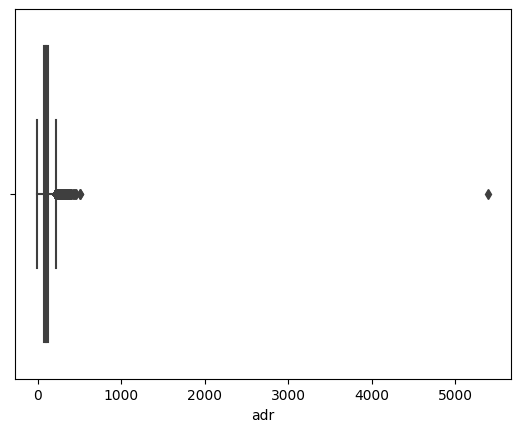

In [230]:
# Checking the distribustion of ard
sns.boxplot(x = df['adr'])

In [231]:
# Checking data with adr is more than 5000
df[df['adr'] > 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
48515,City Hotel,1,35,2018,May,13,25,0,1,2,...,1,Non Refund,12.0,0,0,Personal,5400.0,0,0,Canceled


We can tell that this booking is an incorrect data because it has an extremely high adr with canceled reservation status, so we will drop this record.

In [232]:
# Checking data with negative adr
df[df['adr'] < 0]['adr']

14969   -6.38
Name: adr, dtype: float64

There is negative adr value, so we will drop this row.

In [233]:
# Drop data with negative adr
df = df[df['adr'] >= 0]

In [234]:
# Checking data with no guest
df['total_guest'] = df['children'] + df['adults'] + df['babies']
df[df['total_guest'] == 0][['hotel', 'is_canceled', 'total_guest']]

,hotel,is_canceled,total_guest
2224,Resort Hotel,0,0
2409,Resort Hotel,0,0
3181,Resort Hotel,0,0
3684,Resort Hotel,0,0
3708,Resort Hotel,0,0
...,...,...,...
115029,City Hotel,0,0
115091,City Hotel,0,0
116251,City Hotel,0,0
116534,City Hotel,0,0


180 bookings are not canceled but do not have any guests, so we will drop these record

In [235]:
# Drop booking data that has no guest
df = df[df['total_guest'] != 0]
df.shape

(119209, 30)

For analysis purpose, we will change is_canceled value to 'Yes' and 'No', and we also will change is_repeated_guest value to 'Yes' and 'No'.

In [236]:
df['is_canceled'] = df['is_canceled'].replace({1:'Canceled', 0:'Not Canceled'})
df['is_repeated_guest'] = df['is_repeated_guest'].replace({1:'Yes', 0:'No'})

### Data Analysis

**How many bookings were there from 2017 to 2019?**

In [237]:
len(df)

119209

There were 119209 bookings from 2017 to 2019

**Ratio of canceled and not canceled booking**

In [238]:
# Ratio of canceled booking
canceled = df.groupby('is_canceled')['hotel'].agg('count').reset_index().rename(columns = {'hotel' : 'count'})
canceled

,is_canceled,count
0,Canceled,44199
1,Not Canceled,75010


In [239]:
canceledplot = py.pie(canceled, values=canceled['count'], color=canceled['is_canceled'], names=canceled['is_canceled'], color_discrete_sequence=["#e63946","#457b9d"], hole=0.5)
canceledplot.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",rotation = -115)
canceledplot.update_layout(width=700, height=500)
canceledplot.update_layout(title="<b>Canceled Booking</b>", title_font=dict(size=16))
canceledplot

37.1% of the bookings are cancellations, and this value is quite high, so the company needs to reduce it. Next, an analysis will be conducted to understand the tendencies of customers who cancel their bookings.

**Repeated Customer VS Canceled Booking**

In [240]:
# Distribution of hotel type
repeat_cancel = df.groupby(['is_repeated_guest','is_canceled']).agg(total = ('is_repeated_guest','count')).reset_index()
repeat_cancel_plot = py.bar(repeat_cancel, x = 'is_repeated_guest', y = 'total', color = 'is_canceled',color_discrete_sequence=["#e63946","#457b9d"])
repeat_cancel_plot.update_layout(title={
        'text': 'Repeated Customer VS Canceled Booking',
        'x': 0.5,
        'xanchor': 'center'
    })
repeat_cancel_plot.update_layout(width=500, height=500)
repeat_cancel_plot.show()

The majority of customers is a new customer, and the number of canceled booking from new customer is higher than from the repeated customer. But we need to check if the proportion is different or not by conducting z-proportion test. 

In [241]:
import statsmodels.api as sm
import numpy as np

# Define the number of successes and total observations for two groups
canceled1 = len(df[(df['is_repeated_guest'] == 'No') & (df['is_canceled'] == 'Canceled')])
count1 = len(df[df['is_repeated_guest'] == 'No'])

canceled2 = len(df[(df['is_repeated_guest'] == 'Yes') & (df['is_canceled'] == 'Canceled')])
count2 = len(df[df['is_repeated_guest'] == 'Yes'])

# Calculate the proportions for each group
proportion_group1 = canceled1 / count1
proportion_group2 = canceled2 / count2

# Perform the z-proportion test
z_stat, p_value = sm.stats.proportions_ztest([canceled1, canceled2], [count1, count2])

# Print the test results
print("Z-statistic:", round(z_stat,2))
print("p-value:", round(p_value,2))

# Interpret the results
if p_value < 0.05:
    print("The difference in proportions between the two groups is statistically significant.")
else:
    print("There is no significant difference in proportions between the two groups.")

# Compare the proportions and identify the group with the highest proportion
if proportion_group1 > proportion_group2:
    print("Canceled Booking of New Customer has the highest proportion:", round(proportion_group1,2))
elif proportion_group2 > proportion_group1:
    print("Canceled Booking of Repeated Customer has the highest proportion:", round(proportion_group2,2))
else:
    print("Both groups have the same proportion.")

Z-statistic: 28.91
p-value: 0.0
The difference in proportions between the two groups is statistically significant.
Canceled Booking of New Customer has the highest proportion: 0.38


From the z proportion test, we can say that the proportion of canceled bookings from two groups are different, and Canceled booking from new customer has higher ratio. So we can say that new customers tend to have a higher tendency to cancel bookings.

**Distribution of Hotel type**

In [242]:
# Distribution of hotel type
hotel_type = df.groupby(['hotel','is_canceled']).agg(total = ('hotel','count')).reset_index()
hotel_type_plot = py.bar(hotel_type, x = 'hotel', y = 'total', color = 'is_canceled',color_discrete_sequence=["#e63946","#457b9d"])
hotel_type_plot.update_layout(title={
        'text': 'Distribution of Hotel Type and Cancel Status',
        'x': 0.5,
        'xanchor': 'center'
    })
hotel_type_plot.update_layout(width=500, height=500)
hotel_type_plot.show()

We can say that, the majority of customer books City hotel, and the number of canceled booking from city hotel is higher than resort hotel.

**Monthly report of Cancel Status**

In [243]:
#Monthly Report of Cancel Status
df['month'] = pd.to_datetime(df['arrival_date_month'], format='%B')
monthly_cancel = df.groupby(['month','arrival_date_month', 'is_canceled']).agg(count = ('is_canceled', 'count')).reset_index().sort_values('month')

In [244]:
monthly_cancel_plot = go.Figure()
monthly_cancel_plot = (py.line(monthly_cancel, x = 'arrival_date_month', y = 'count', color = 'is_canceled',color_discrete_sequence=["#e63946","#457b9d"]))
monthly_cancel_plot.update_layout(title={
        'text': 'Monthly Reservation by Cancel Status',
        'x': 0.5,
        'xanchor': 'center'
    })
monthly_cancel_plot.update_layout(width=1000, height=500)
monthly_cancel_plot.show()

We can conclude that the trends for canceled and not canceled bookings are fairly similar. Both types of bookings are highest around September and October, and reach their lowest point in March. 

**Yearly Report of Cancel Status**

In [245]:
#Monthly Report of Cancel Status
yearly_cancel = df.groupby(['arrival_date_year', 'is_canceled']).agg(count = ('is_canceled', 'count')).reset_index()
yearly_cancel

,arrival_date_year,is_canceled,count
0,2017,Canceled,8141
1,2017,Not Canceled,13826
2,2018,Canceled,20324
3,2018,Not Canceled,36299
4,2019,Canceled,15734
5,2019,Not Canceled,24885


In [246]:
yearly_cancel_plot = go.Figure()
yearly_cancel_plot = (py.line(yearly_cancel, x = 'arrival_date_year', y = 'count', color = 'is_canceled',color_discrete_sequence=["#e63946","#457b9d"]))
yearly_cancel_plot.update_layout(title={
        'text': 'Monthly Reservation by Cancel Status',
        'x': 0.5,
        'xanchor': 'center'
    })
yearly_cancel_plot.update_layout(width=1000, height=500)
yearly_cancel_plot.show()

The year 2018 had the highest booking numbers compared to other years, and 2017 was the lowest.

**Family Category VS Cancel status**

In [247]:
# Defining Family Category
list = []
for index, i in df.iterrows():
    if ((i['adults'] > 0) & ((i['children'] > 0) | (i['babies'] > 0))):
        list.append('Family')
    else : list.append('Non Family')
df['Family_Type'] = list

In [292]:
# Distribution of hotel type
family_cancel = df.groupby(['Family_Type','is_canceled']).agg(total = ('Family_Type','count')).reset_index()
family_cancel

,Family_Type,is_canceled,total
0,Family,Canceled,3175
1,Family,Not Canceled,5934
2,Non Family,Canceled,41024
3,Non Family,Not Canceled,69076


In [295]:
family_cancel_plot = py.bar(family_cancel, x = 'Family_Type', y = 'total', color = 'is_canceled', color_discrete_sequence=["#e63946","#457b9d"])
family_cancel_plot.update_layout(title={
        'text': 'Distribution of Family Type',
        'x': 0.5,
        'xanchor': 'center'
    })
family_cancel_plot.update_layout(width=500, height=500)
family_cancel_plot.show()

The majority of customers are non family customers, and the number of canceled booking of non family customer is also higher than the family customer.

**Ratio of City and Resort Hotel Booking**

In [250]:
# Ratio of canceled booking
hotel_type = df.groupby('hotel')['is_canceled'].agg('count').reset_index().rename(columns = {'is_canceled' : 'count'})
hotel_type

,hotel,count
0,City Hotel,79163
1,Resort Hotel,40046


In [251]:
hotel_type_plot = py.pie(hotel_type, values=hotel_type['count'], color=hotel_type['hotel'], names=hotel_type['hotel'], color_discrete_sequence=["#1d3557","#f77f00"], hole=0.5)
hotel_type_plot.update_traces(textposition="outside", textfont=dict(color="black",size=13), textinfo="label+percent",rotation = -115)
hotel_type_plot.update_layout(width=500, height=500)
hotel_type_plot.update_layout(title="<b>Canceled Booking</b>", title_font=dict(size=16))
hotel_type_plot

66,4% of bookings are City Hotel.

In [296]:
df['is_canceled'] = df['is_canceled'].replace({'Canceled':1, 'Not Canceled':0})
hotel_booking_duration = df.groupby(['hotel']).agg({'is_canceled': 'sum', 'arrival_date_day_of_month': 'count'}).rename(columns={'is_canceled': 'canceled_booking', 'arrival_date_day_of_month': 'total_booking'}).reset_index()
hotel_booking_duration['cancelation_rate'] = (hotel_booking_duration['canceled_booking'] / hotel_booking_duration['total_booking']).round(4) * 100
display(hotel_booking_duration)

,hotel,canceled_booking,total_booking,cancelation_rate
0,City Hotel,33079,79163,41.79
1,Resort Hotel,11120,40046,27.77


In [302]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=hotel_booking_duration['hotel'],
    y=hotel_booking_duration['cancelation_rate'],
    marker_color=["#1d3557","#f77f00"],
    text=hotel_booking_duration['cancelation_rate'].round(1).astype(str) + '%',
    textposition='outside'
))
fig.update_layout(barmode='group')
fig.update_layout(
    title={
        'text': 'Cancellation Rate of Each Hotel Type (%)',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=500,
    height=500
)

fig.show()

Basically, city hotel's cancelation rate is higher than the resort hotel. 

**Monthly Hotel Booking Analysis Based on Hotel Type**

In [252]:
# Monthly reservation by hotel type
monthly_res = df.groupby(['month','arrival_date_month', 'hotel']).agg(count = ('hotel', 'count')).reset_index().sort_values('month')
monthly_res[['arrival_date_month','hotel','count']]

,arrival_date_month,hotel,count
0,January,City Hotel,4336
1,January,Resort Hotel,2435
2,February,City Hotel,4114
3,February,Resort Hotel,2645
4,March,City Hotel,3730
5,March,Resort Hotel,2191
6,April,City Hotel,4950
7,April,Resort Hotel,3102
8,May,City Hotel,6434
9,May,Resort Hotel,3333


In [253]:
fig = go.Figure()
fig = (py.line(monthly_res, x = 'arrival_date_month', y = 'count', color = 'hotel',color_discrete_sequence=["#1d3557","#f77f00"]))
fig.update_layout(title={
        'text': 'Monthly Reservation by Hotel Type',
        'x': 0.5,
        'xanchor': 'center'
    }
    )
fig.update_layout(width=1000, height=500)

fig.add_trace(go.Scatter(x=['January','April'], y=[10000,10000], fill='tozeroy', 
                    mode='none', showlegend = False, fillcolor='rgba(233, 30, 0, 0.1)', opacity=0.1))

fig.add_annotation(x=1.4, y=10600,
            text="Low Season",
            showarrow=False,
            arrowhead=1)

fig.add_trace(go.Scatter(x=['July','October'], y=[10000,10000], fill='tozeroy', 
                    mode='none', showlegend = False, fillcolor='rgba(0, 0, 0, 0.2)', opacity=0.1))

fig.add_annotation(x=7.5, y=10600,
            text="Peak Season",
            showarrow=False,
            arrowhead=1)

fig.show()

High booking numbers are around the months of July until October. During the year, city hotels are booked more frequently than resort hotels. 

As we know, July to October is not the holiday season, and the majority of customers are not families. Therefore, it is likely that many customers are traveling for business purposes or reasons other than vacation. Moreover, city hotels are typically located in the center of the city where many offices and economic activities take place.

**Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [255]:
list = []

for index, i in df.iterrows():
    if (i['duration'] >= 0) & (i['duration'] <= 7):
        list.append('< 1 week')
    elif (i['duration'] > 7) & (i['duration'] <= 14):
        list.append('1-2 week')
    elif (i['duration'] > 14) & (i['duration'] <= 21):
        list.append('2-3 weeks')
    elif (i['duration'] > 21) & (i['duration'] <= 28):
        list.append('3-4 weeks')
    else : list.append('> 4 week')
df['booking_duration'] = list

In [256]:
df['is_canceled'] = df['is_canceled'].replace({'Canceled':1, 'Not Canceled':0})
cancel_booking_duration = df.groupby(['hotel', 'booking_duration']).agg({'is_canceled': 'sum', 'arrival_date_day_of_month': 'count'}).rename(columns={'is_canceled': 'canceled_booking', 'arrival_date_day_of_month': 'total_booking'}).reset_index()
df['is_canceled'] = df['is_canceled'].replace({1:'Canceled', 0:'Not Canceled'})
duration_order = pd.CategoricalDtype(categories=['< 1 week', '1-2 week', '2-3 weeks', '3-4 weeks', '> 4 week'], ordered=True)
cancel_booking_duration['booking_duration'] = cancel_booking_duration['booking_duration'].astype(duration_order)
cancel_booking_duration = cancel_booking_duration.sort_values('booking_duration')
cancel_booking_duration['cancelation_rate'] = (cancel_booking_duration['canceled_booking'] / cancel_booking_duration['total_booking']).round(4) * 100
display(cancel_booking_duration)

,hotel,booking_duration,canceled_booking,total_booking,cancelation_rate
3,City Hotel,< 1 week,32404,77942,41.57
8,Resort Hotel,< 1 week,9917,36042,27.52
0,City Hotel,1-2 week,558,1069,52.20
5,Resort Hotel,1-2 week,1078,3727,28.92
1,City Hotel,2-3 weeks,76,105,72.38
6,Resort Hotel,2-3 weeks,79,169,46.75
2,City Hotel,3-4 weeks,21,25,84.00
7,Resort Hotel,3-4 weeks,39,83,46.99
4,City Hotel,> 4 week,20,22,90.91
9,Resort Hotel,> 4 week,7,25,28.00


In [306]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=cancel_booking_duration[cancel_booking_duration['hotel'] == 'City Hotel']['booking_duration'],
    y=cancel_booking_duration[cancel_booking_duration['hotel'] == 'City Hotel']['cancelation_rate'],
    name='City Hotel',
    marker_color='#1d3557',
    text=cancel_booking_duration[cancel_booking_duration['hotel'] == 'City Hotel']['cancelation_rate'].round(1).astype(str) + '%',
    textposition='outside'
))
fig.add_trace(go.Bar(
    x=cancel_booking_duration[cancel_booking_duration['hotel'] == 'Resort Hotel']['booking_duration'],
    y=cancel_booking_duration[cancel_booking_duration['hotel'] == 'Resort Hotel']['cancelation_rate'],
    name='Resort Hotel',
    marker_color='#f77f00',
    text=cancel_booking_duration[cancel_booking_duration['hotel'] == 'Resort Hotel']['cancelation_rate'].round(1).astype(str) + '%',
    textposition='outside'
))
fig.update_layout(barmode='group')
fig.update_layout(
    title={
        'text': 'Cancellation Rate of Each Hotel <br> Type by Stay Duration',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=600,
    height=500
)

fig.show()

Basically, the cancellation rate of the city hotel is higher than the resort hotel. It is known that the longer the stay duration of customers, the higher the cancellation rate at the city hotel. The cancellation rate of the resort hotel tends to be consistent, ranging from 27% to 45%.

We need to highlight the cancellation rate of the city hotel. The cancellation rate for bookings with a stay duration of more than 2 weeks is over 50%, which is a high number. Therefore, the company needs to develop a strategy to reduce the cancellation rate.

If many customers cancel their bookings, it will have a negative impact on the hotel's business performance. Therefore, the company needs to develop a strategy to reduce the cancellation rate. 

**Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [289]:
list = []

for index, i in df.iterrows():
    if (i['lead_time'] >= 0) & (i['lead_time'] <= 30):
        list.append('< 1 month')
    elif (i['lead_time'] > 30) & (i['lead_time'] <= 90):
        list.append('1-3 month')
    elif (i['lead_time'] > 90) & (i['lead_time'] <= 150):
        list.append('3-5 month')
    elif (i['lead_time'] > 150) & (i['lead_time'] <= 210):
        list.append('5-7 month')
    elif (i['lead_time'] > 210) & (i['lead_time'] <= 270):
        list.append('7-9 month')
    elif (i['lead_time'] > 270) & (i['lead_time'] <= 360):
        list.append('9-11 month')
    elif (i['lead_time'] > 360) & (i['lead_time'] <= 420):
        list.append('11-13 month')
    else : list.append('> 13 month')
df['leadtime_duration'] = list

In [290]:
df['is_canceled'] = df['is_canceled'].replace({'Canceled':1, 'Not Canceled':0})
cancel_leadtime_duration = df.groupby(['hotel', 'leadtime_duration']).agg({'is_canceled': 'sum', 'arrival_date_day_of_month': 'count'}).rename(columns={'is_canceled': 'canceled_booking', 'arrival_date_day_of_month': 'total_booking'}).reset_index()
df['is_canceled'] = df['is_canceled'].replace({1:'Canceled', 0:'Not Canceled'})
leadtime_order = pd.CategoricalDtype(categories=['< 1 month','1-3 month','3-5 month','5-7 month','7-9 month','9-11 month','11-13 month','> 13 month'], ordered=True)
cancel_leadtime_duration['leadtime_duration'] = cancel_leadtime_duration['leadtime_duration'].astype(leadtime_order)
cancel_leadtime_duration = cancel_leadtime_duration.sort_values('leadtime_duration')
cancel_leadtime_duration['cancelation_rate'] = (cancel_leadtime_duration['canceled_booking'] / cancel_leadtime_duration['total_booking']).round(4) * 100
display(cancel_leadtime_duration)

,hotel,leadtime_duration,canceled_booking,total_booking,cancelation_rate
6,City Hotel,< 1 month,5184,23244,22.30
14,Resort Hotel,< 1 month,1984,15336,12.94
0,City Hotel,1-3 month,8300,20776,39.95
8,Resort Hotel,1-3 month,2841,8753,32.46
2,City Hotel,3-5 month,6028,13048,46.20
10,Resort Hotel,3-5 month,2191,5518,39.71
3,City Hotel,5-7 month,4509,8751,51.53
11,Resort Hotel,5-7 month,1654,4761,34.74
4,City Hotel,7-9 month,2517,4621,54.47
12,Resort Hotel,7-9 month,1373,3091,44.42


In [307]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'City Hotel']['leadtime_duration'],
    y=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'City Hotel']['cancelation_rate'],
    name='City Hotel',
    marker_color='#1d3557',
    text=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'City Hotel']['cancelation_rate'].round(1).astype(str) + '%',
    textposition='outside'
))
fig.add_trace(go.Bar(
    x=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'Resort Hotel']['leadtime_duration'],
    y=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'Resort Hotel']['cancelation_rate'],
    name='Resort Hotel',
    marker_color='#f77f00',
    text=cancel_leadtime_duration[cancel_leadtime_duration['hotel'] == 'Resort Hotel']['cancelation_rate'].round(1).astype(str) + '%',
    textposition='outside'
))
fig.update_layout(barmode='group')
fig.update_layout(
    title={
        'text': 'Cancellation Rate of Each Hotel Type based on the Lead Time',
        'x': 0.5,
        'xanchor': 'center'
    },
    width=1000,
    height=500
)

fig.show()

The cancellation rate of the city hotel for each lead time is higher than that of the resort hotels. As we know, the lead time of more than 9 months is particularly high, especially for the city hotel that reach above 70%. 

Therefore, the company needs to develop a strategy to decrease the cancellation rate by considering offering special packages or deals specifically for bookings with high lead time. This can provide added value to customers and encourage them to proceed with their bookings.

## Conclusions

* The majority of customers are non-family customers, who book city hotels which are mainly located in the center of the city. The majority of the customer tends to be on non-vacancy purpose. The company needs to make strategies or marketing that refer to the needs and preferences of these customers.

* Above 90% of the customers are new customers. Having a high number of new customers is a positive indication of the company's ability to attract new business, but the company needs to be focuses on building customer loyalty. 

    Therefore, the company should implement strategies that prioritize customer retention, such as loyalty programs, personalized experiences, and excellent customer service, to ensure a strong foundation of loyal customers and sustained business growth.

* For the city hotel, the longer the stay duration, the higher the cancellation rate tends to be. Therefore, the company needs to implement promotions to decrease the cancellation rate, such as offering discounts for customers who stay for more than 2 weeks.

* As we know the longer the lead time, the cancellation rate tends to be higher, the company needs to develop a strategy to decrease the cancellation rate by considering offering special packages or deals specifically for bookings with high lead time.  This can make customers change their minds and encourage them to proceed with their booking.